# Distance errors in APOGEE DR17

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
from apogee_tools import import_apogee, apogee_region
import paths
from utils import quad_add
import _globals

In [2]:
apogee_data = import_apogee()
apogee_data['GAIAEDR3_R_PHOTOGEO_ERR'] = quad_add(
    apogee_data['GAIAEDR3_R_HI_PHOTOGEO'] - apogee_data['GAIAEDR3_R_MED_PHOTOGEO'], 
    apogee_data['GAIAEDR3_R_MED_PHOTOGEO'] - apogee_data['GAIAEDR3_R_LO_PHOTOGEO'])

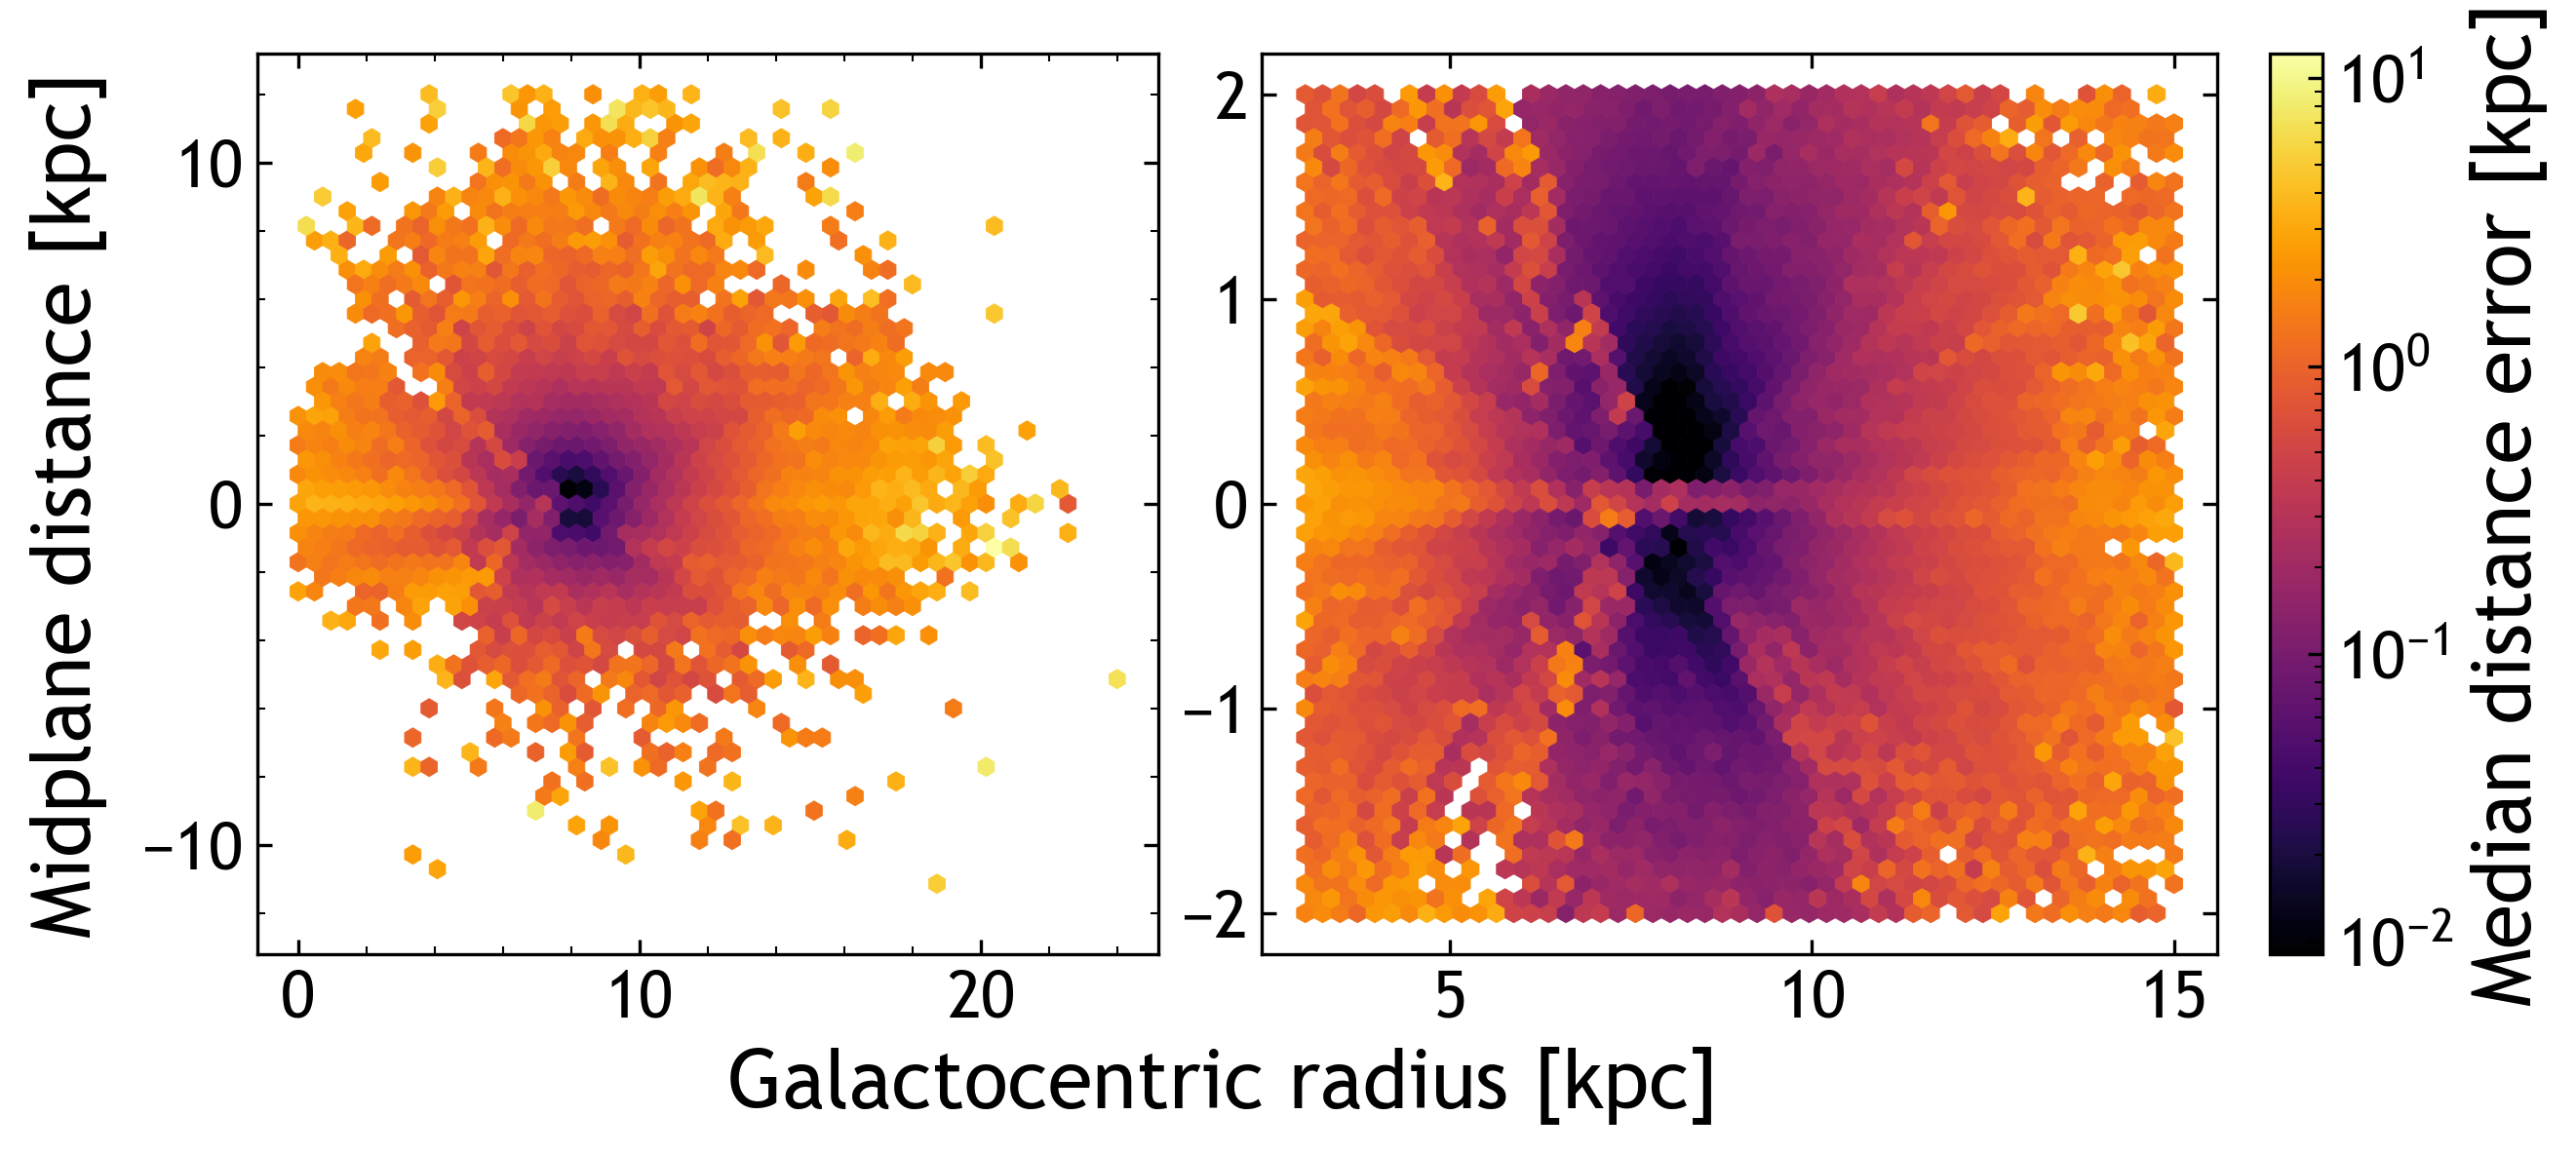

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
plt.style.use(paths.styles / 'presentation.mplstyle')
# Overview
xlim0 = (0, 24)
ylim0 = (-12, 12)
extent0 = [xlim0[0], xlim0[1], ylim0[0], ylim0[1]]
norm = LogNorm()
hb0 = axs[0].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    C=apogee_data['GAIAEDR3_R_PHOTOGEO_ERR']/1000, reduce_C_function=np.median,
                    gridsize=50, cmap='inferno', norm=norm, 
                    extent=extent0, linewidths=0.2)
# fig.colorbar(hb0, ax=axs[0], shrink=0.8)
# axs[0].set_title('Median distance error [kpc]')
axs[0].set_aspect('equal')
axs[0].xaxis.set_minor_locator(MultipleLocator(2))
axs[0].yaxis.set_major_locator(MultipleLocator(10))
axs[0].yaxis.set_minor_locator(MultipleLocator(2))
# Zoom-in
xlim1 = (3, 15)
ylim1 = (-2, 2)
extent1 = [xlim1[0], xlim1[1], ylim1[0], ylim1[1]]
hb1 = axs[1].hexbin(apogee_data['GALR'], apogee_data['GALZ'], 
                    C=apogee_data['GAIAEDR3_R_PHOTOGEO_ERR']/1000, reduce_C_function=np.median,
                    gridsize=50, cmap='inferno', norm=norm, 
                    extent=extent1, linewidths=0.2)
# axs[1].set_aspect('equal')
# axs[1].set_title('APOGEE DR17')
plt.subplots_adjust(right=0.88, wspace=0.08)
cax = plt.axes([0.9, 0.11, 0.02, 0.77])
fig.colorbar(hb0, cax, label='Median distance error [kpc]')
# Common axis labels
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('Galactocentric radius [kpc]')
plt.ylabel('Midplane distance [kpc]')
plt.show()

In [14]:
bin_dist_err = apogee_data.groupby([pd.cut(apogee_data['GALR'], _globals.GALR_BINS), 
                                    pd.cut(apogee_data['GALZ'], _globals.ABSZ_BINS)], 
                                    observed=False)['GAIAEDR3_R_PHOTOGEO_ERR'].median()
bin_dist_err

GALR      GALZ      
(3, 5]    (0.0, 0.5]    1497.932337
          (0.5, 1.0]     994.239272
          (1.0, 2.0]     809.327637
(5, 7]    (0.0, 0.5]     276.406859
          (0.5, 1.0]     235.301909
          (1.0, 2.0]     168.550187
(7, 9]    (0.0, 0.5]      28.737968
          (0.5, 1.0]      22.598741
          (1.0, 2.0]      62.036065
(9, 11]   (0.0, 0.5]     158.379738
          (0.5, 1.0]      96.723743
          (1.0, 2.0]     151.567415
(11, 13]  (0.0, 0.5]     499.535682
          (0.5, 1.0]     448.447229
          (1.0, 2.0]     467.279045
(13, 15]  (0.0, 0.5]    1437.487783
          (0.5, 1.0]    1188.120639
          (1.0, 2.0]    1199.369591
Name: GAIAEDR3_R_PHOTOGEO_ERR, dtype: float64

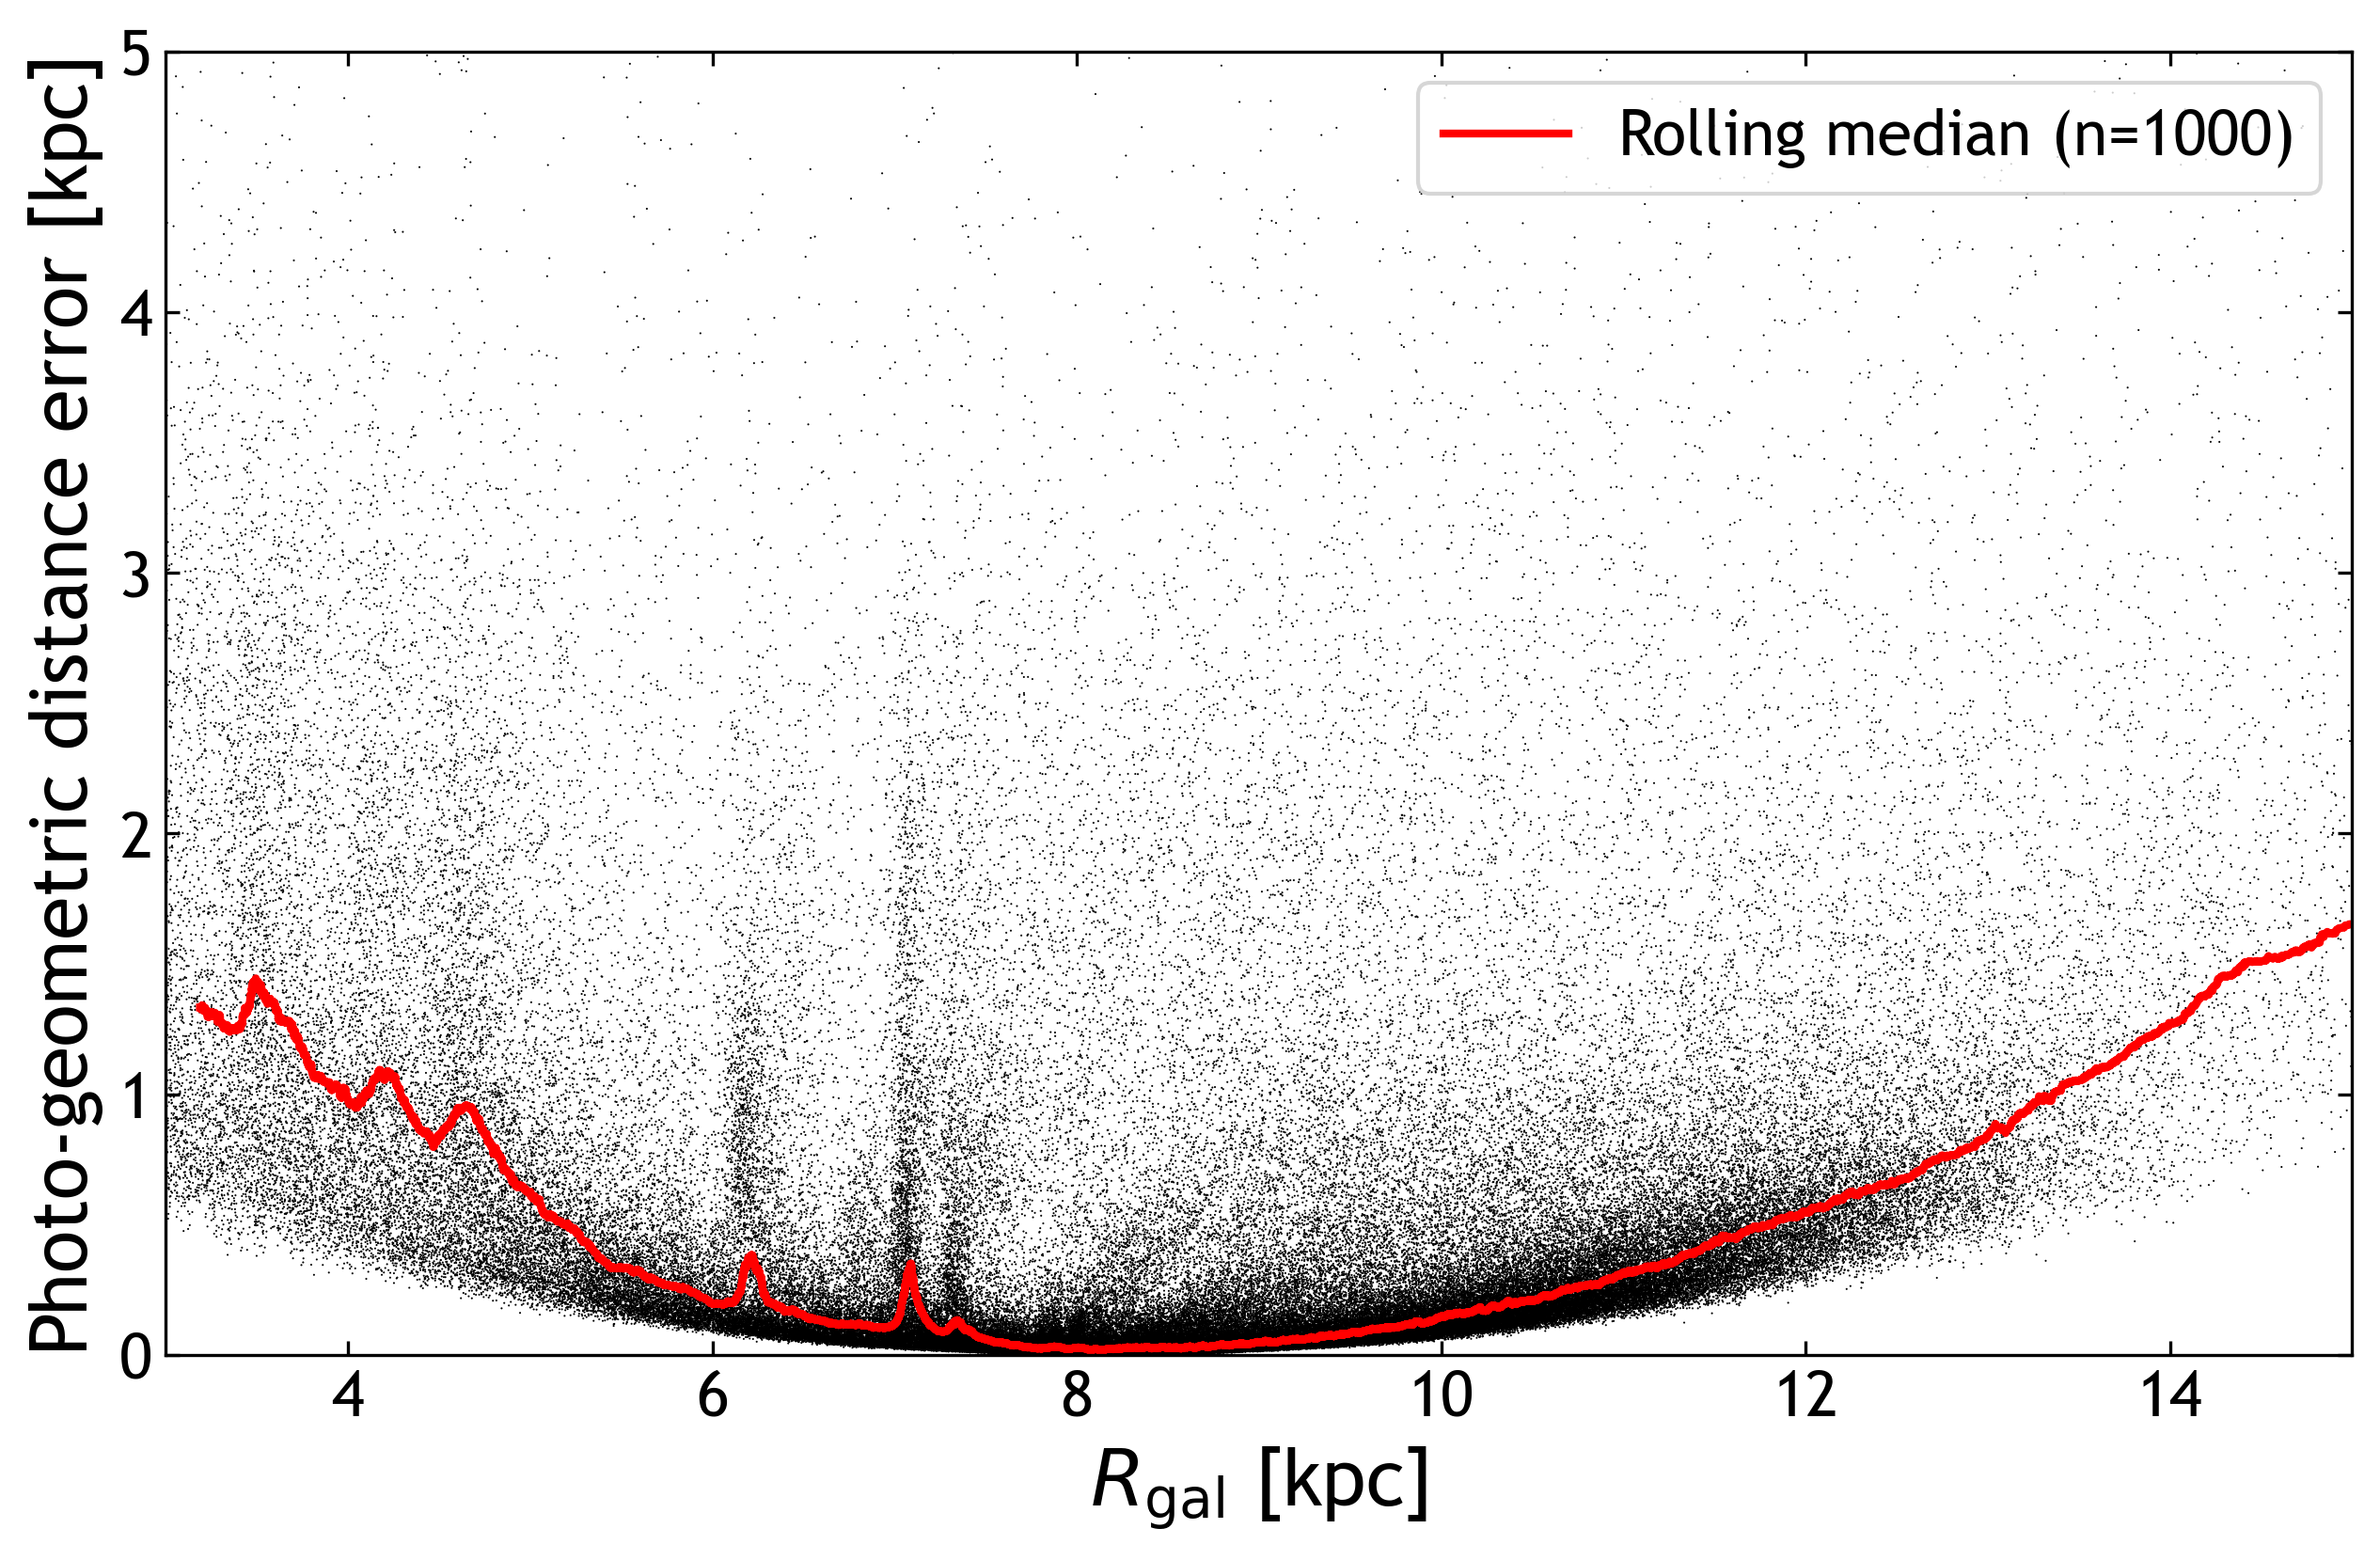

In [40]:
fig, ax = plt.subplots()
apogee_subset = apogee_region(apogee_data, galr_lim=(3, 15), absz_lim=(0, 2))
ax.scatter(apogee_subset['GALR'], apogee_subset['GAIAEDR3_R_PHOTOGEO_ERR']/1000, 
           s=1, marker='.', c='k', edgecolor='none')
# Rolling median
apogee_sorted = apogee_subset.sort_values('GALR')
n = 1000
rolling_dist_err_med = apogee_sorted['GAIAEDR3_R_PHOTOGEO_ERR'].rolling(n).median()
ax.plot(apogee_sorted['GALR'], rolling_dist_err_med/1000, 'r-', label='Rolling median (n=%s)' % n)
ax.set_xlim((3, 15))
ax.set_ylim((0, 5))
ax.set_xlabel(r'$R_{\rm gal}$ [kpc]')
ax.set_ylabel('Photo-geometric distance error [kpc]')
ax.legend()
plt.show()